<a href="https://colab.research.google.com/github/Atharva-D/MOT/blob/main/MOT_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading the csv file
data = pd.read_csv("/content/gdrive/MyDrive/MOT/India_Data/All India Data/city_hour.csv",index_col="Datetime",parse_dates=True)
data

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Datetime,,,,,,,,,,,,,,,
2015-01-01 01:00:00,Ahmedabad,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
2015-01-01 02:00:00,Ahmedabad,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2015-01-01 03:00:00,Ahmedabad,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
2015-01-01 04:00:00,Ahmedabad,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
2015-01-01 05:00:00,Ahmedabad,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 20:00:00,Visakhapatnam,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
2020-06-30 21:00:00,Visakhapatnam,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
2020-06-30 22:00:00,Visakhapatnam,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good


In [4]:
data_Delhi = data.loc[data['City'] == "Delhi"]
data_Delhi

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Datetime,,,,,,,,,,,,,,,
2015-01-01 01:00:00,Delhi,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN
2015-01-01 02:00:00,Delhi,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN
2015-01-01 03:00:00,Delhi,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN
2015-01-01 04:00:00,Delhi,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN
2015-01-01 05:00:00,Delhi,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 20:00:00,Delhi,43.19,123.26,6.33,22.28,17.66,29.92,0.92,10.64,44.13,1.63,17.83,0.86,97.0,Satisfactory
2020-06-30 21:00:00,Delhi,45.30,125.22,6.34,22.91,17.96,29.95,1.04,10.59,39.62,1.72,18.06,1.16,99.0,Satisfactory
2020-06-30 22:00:00,Delhi,49.04,129.39,6.29,20.95,16.80,30.01,1.00,10.20,38.95,1.66,16.17,1.18,101.0,Moderate


In [5]:
data_Delhi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48192 entries, 2015-01-01 01:00:00 to 2020-07-01 00:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        48192 non-null  object 
 1   PM2.5       47817 non-null  float64
 2   PM10        45771 non-null  float64
 3   NO          47894 non-null  float64
 4   NO2         47862 non-null  float64
 5   NOx         48167 non-null  float64
 6   NH3         47212 non-null  float64
 7   CO          47828 non-null  float64
 8   SO2         45340 non-null  float64
 9   O3          45991 non-null  float64
 10  Benzene     48154 non-null  float64
 11  Toluene     48166 non-null  float64
 12  Xylene      29288 non-null  float64
 13  AQI         47694 non-null  float64
 14  AQI_Bucket  47694 non-null  object 
dtypes: float64(13), object(2)
memory usage: 5.9+ MB


In [6]:
data_Delhi.isnull().sum()

City              0
PM2.5           375
PM10           2421
NO              298
NO2             330
NOx              25
NH3             980
CO              364
SO2            2852
O3             2201
Benzene          38
Toluene          26
Xylene        18904
AQI             498
AQI_Bucket      498
dtype: int64

In [7]:
data_Delhi=data_Delhi.ffill().bfill() #Fill the NaN values

In [8]:
data_Delhi.isnull().sum()

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [9]:
len(data_Delhi)

48192

In [10]:
data_Delhi.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Datetime,,,,,,,,,,,,,,,
2015-01-01 01:00:00,Delhi,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,456.0,Severe
2015-01-01 02:00:00,Delhi,440.44,935.18,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,456.0,Severe
2015-01-01 03:00:00,Delhi,409.09,935.18,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,456.0,Severe
2015-01-01 04:00:00,Delhi,436.12,935.18,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,456.0,Severe
2015-01-01 05:00:00,Delhi,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,456.0,Severe


In [11]:
data_Delhi = data_Delhi.drop(columns=("City"))

In [12]:
data_Delhi=data_Delhi.drop(columns=("AQI_Bucket"))

In [13]:
data_Delhi.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Datetime,,,,,,,,,,,,,
2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,456.0
2015-01-01 02:00:00,440.44,935.18,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,456.0
2015-01-01 03:00:00,409.09,935.18,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,456.0
2015-01-01 04:00:00,436.12,935.18,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,456.0
2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,456.0


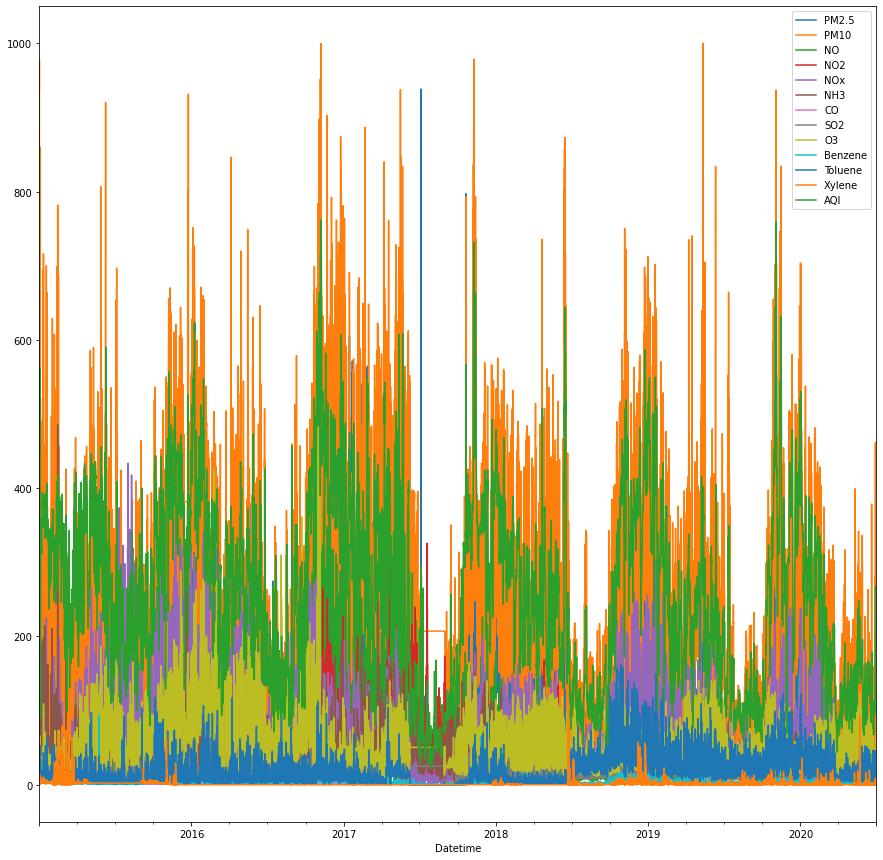

In [14]:
data_Delhi.plot(figsize=(15,15))

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


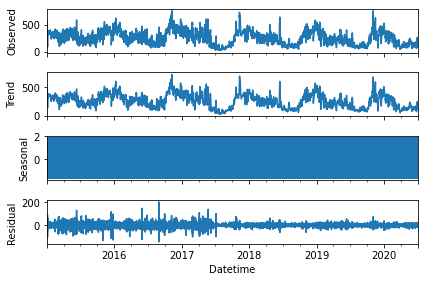

In [16]:
results = seasonal_decompose(data_Delhi['AQI'])
results.plot();

In [20]:
values = data_Delhi.values
groups = [1,2,3,4,5,6,7,8,9,10,11,12]

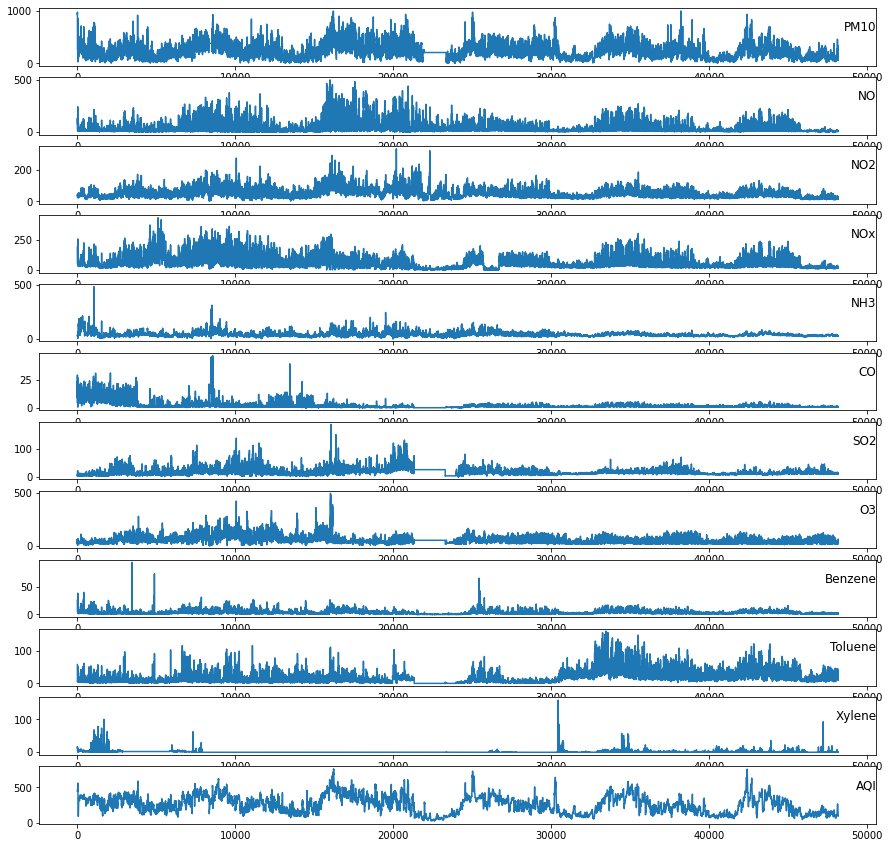

In [21]:
i = 1
# plot each column
plt.figure(figsize=(15,15))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(data_Delhi.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [22]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [23]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [24]:
dataset = data_Delhi
values = dataset.values
# # integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[0,1,2,3,4,5,6,7,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())

   var13(t-1)   var1(t)   var2(t)  ...  var11(t)  var12(t)  var13(t)
1    0.586487  0.469274  0.934986  ...  0.304753  0.098407  0.586487
2    0.586487  0.435868  0.934986  ...  0.240370  0.108166  0.586487
3    0.586487  0.464670  0.934986  ...  0.169938  0.105899  0.586487
4    0.586487  0.443103  0.976921  ...  0.135741  0.089970  0.586487
5    0.586487  0.409303  0.861817  ...  0.128704  0.078197  0.586487

[5 rows x 14 columns]


In [25]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 13) (8760,) (39431, 1, 13) (39431,)


In [26]:
from keras import Sequential
from keras.layers import Dense,LSTM


Epoch 1/50
122/122 - 3s - loss: 0.1289 - val_loss: 0.0916 - 3s/epoch - 28ms/step
Epoch 2/50
122/122 - 2s - loss: 0.0533 - val_loss: 0.0795 - 2s/epoch - 12ms/step
Epoch 3/50
122/122 - 1s - loss: 0.0459 - val_loss: 0.0712 - 887ms/epoch - 7ms/step
Epoch 4/50
122/122 - 1s - loss: 0.0401 - val_loss: 0.0636 - 880ms/epoch - 7ms/step
Epoch 5/50
122/122 - 2s - loss: 0.0343 - val_loss: 0.0547 - 2s/epoch - 12ms/step
Epoch 6/50
122/122 - 2s - loss: 0.0279 - val_loss: 0.0444 - 2s/epoch - 12ms/step
Epoch 7/50
122/122 - 1s - loss: 0.0212 - val_loss: 0.0309 - 862ms/epoch - 7ms/step
Epoch 8/50
122/122 - 1s - loss: 0.0157 - val_loss: 0.0175 - 893ms/epoch - 7ms/step
Epoch 9/50
122/122 - 1s - loss: 0.0113 - val_loss: 0.0109 - 869ms/epoch - 7ms/step
Epoch 10/50
122/122 - 1s - loss: 0.0094 - val_loss: 0.0088 - 871ms/epoch - 7ms/step
Epoch 11/50
122/122 - 2s - loss: 0.0090 - val_loss: 0.0084 - 2s/epoch - 12ms/step
Epoch 12/50
122/122 - 1s - loss: 0.0089 - val_loss: 0.0081 - 869ms/epoch - 7ms/step
Epoch 13/50

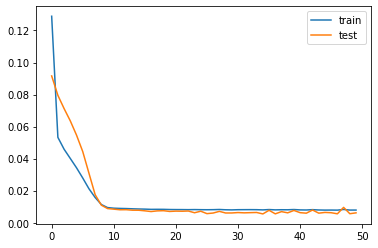

In [27]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [28]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [29]:
...
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9.531


In [34]:
print(inv_y[1:20])

[531.41565 539.0247  532.68384 539.0247  544.0974  546.6338  550.4383
 550.4383  550.4383  549.1701  545.3656  542.8292  568.1928  571.99725
 578.3382  583.4109  592.2881  597.36084 598.629  ]


In [35]:
print(inv_yhat[1:20])

[529.6245  533.5807  540.57623 534.2214  540.2146  545.13434 548.5151
 552.2312  550.9458  549.10046 547.39703 542.5302  541.1659  565.3497
 569.68304 577.1245  583.637   592.3978  596.6868 ]


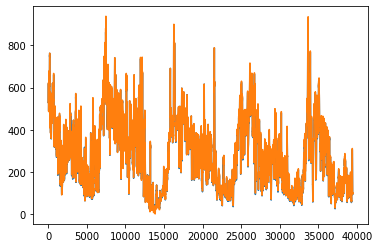

In [30]:
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.show()

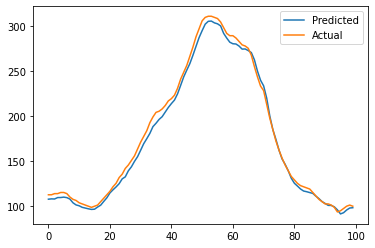

In [40]:
Predicted = inv_yhat[-100:]
Actual = inv_y[-100:]
plt.plot(Predicted)
plt.plot(Actual)
plt.legend(["Predicted", "Actual"])
plt.show()